## Random Forest 1 Year Mortality

In [55]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV

# %matplotlib inline
plt.rcParams.update({'figure.titlesize': 'larger', 'legend.fontsize': 15.0})

In [24]:
data_train_1y = pd.read_csv('data_pp_train_1y.csv')
data_test_1y = pd.read_csv('data_pp_test_1y.csv')

In [25]:
X_train = data_train_1y.copy()
y_train = data_train_1y.copy()
X_test = data_test_1y.copy()
y_test  = data_test_1y.copy()

In [26]:
X_train = X_train.drop(['one_year', 'thirty_days'], axis = 1)
y_train = y_train[['one_year']]

X_test = X_test.drop(['one_year', 'thirty_days'], axis = 1)
y_test = y_test[['one_year']]


y_train = y_train['one_year']
y_test = y_test['one_year']


print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (38857, 109)
38857 train samples
19139 test samples


In [39]:
param_grid = {
    'n_estimators' : [400],
    'bootstrap' : [True],
    'max_features' : ['auto'],
    'oob_score' : [True],
    'max_depth' : [30],
    'min_samples_split' : [3],
    'min_samples_leaf' : [1],
}

In [40]:
clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=2,
    random_state=0
)

In [41]:
grid_search = GridSearchCV(
    clf, 
    param_grid=param_grid, 
    verbose=3,
    scoring='accuracy',
    n_jobs=-1,
    cv=5
).fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   53.0s remaining:  1.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished


In [46]:
best_clf = grid_search.best_estimator_

In [50]:
print(best_clf.score(X_test, y_test))

0.9026594910914886


In [51]:
y_p = best_clf.predict_proba(X_test)[:,1]

In [52]:
fpr, tpr, thresholds = roc_curve(y_test, y_p)

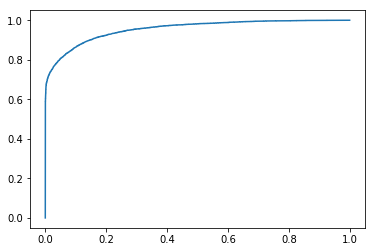

In [53]:
plt.plot(fpr,tpr)

In [56]:
auc(fpr, tpr)

0.954811265413634

In [63]:
names = X_test.columns.tolist()
values = best_clf.feature_importances_

In [69]:
from operator import itemgetter
a = [list(x) for x in zip(*sorted(zip(names, values), key=itemgetter(1)))]


<BarContainer object of 109 artists>

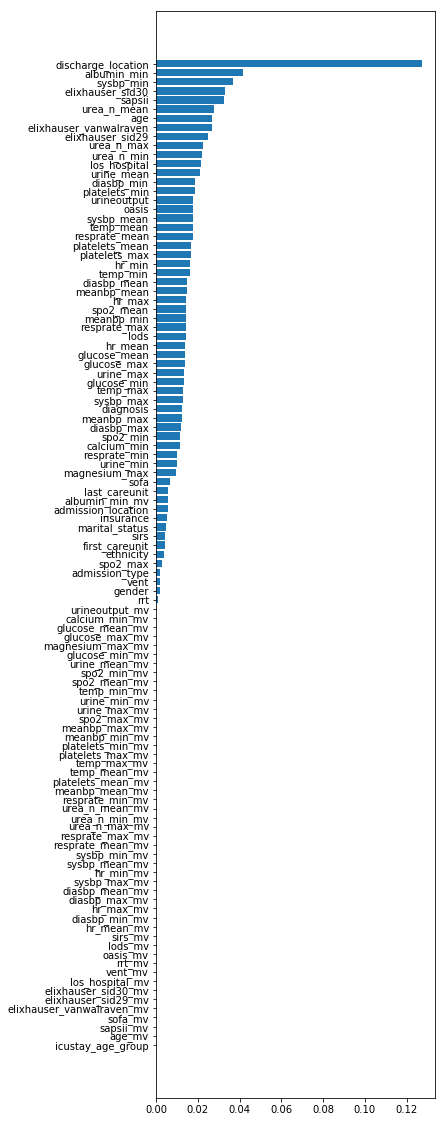

In [71]:
plt.figure(figsize=(5, 20))
plt.barh(a[0],a[1])

In [72]:
data = pd.read_csv('data(with_label).csv')

In [75]:
data.columns

Index(['subject_id', 'hadm_id', 'admittime', 'dischtime', 'deathtime', 'dod',
       'first_careunit', 'last_careunit', 'age', 'gender', 'marital_status',
       'insurance', 'urea_n_min', 'urea_n_max', 'urea_n_mean', 'platelets_min',
       'platelets_max', 'platelets_mean', 'magnesium_max', 'albumin_min',
       'calcium_min', 'resprate_min', 'resprate_max', 'resprate_mean',
       'glucose_min', 'glucose_max', 'glucose_mean', 'hr_min', 'hr_max',
       'hr_mean', 'sysbp_min', 'sysbp_max', 'sysbp_mean', 'diasbp_min',
       'diasbp_max', 'diasbp_mean', 'temp_min', 'temp_max', 'temp_mean',
       'sapsii', 'sofa', 'urine_min', 'urine_mean', 'urine_max',
       'elixhauser_vanwalraven', 'elixhauser_sid29', 'elixhauser_sid30',
       'los_hospital', 'meanbp_min', 'meanbp_max', 'meanbp_mean', 'spo2_min',
       'spo2_max', 'spo2_mean', 'vent', 'rrt', 'urineoutput',
       'icustay_age_group', 'oasis', 'lods', 'sirs', 'admission_type',
       'admission_location', 'discharge_location', 'e

In [82]:
data['los_hospital'].unique()

array([10.7847, 16.3646,  4.8813, ...,  3.0799, 16.5958, 12.1563])